In [2]:
import numpy as np
import matplotlib.pyplot as plt

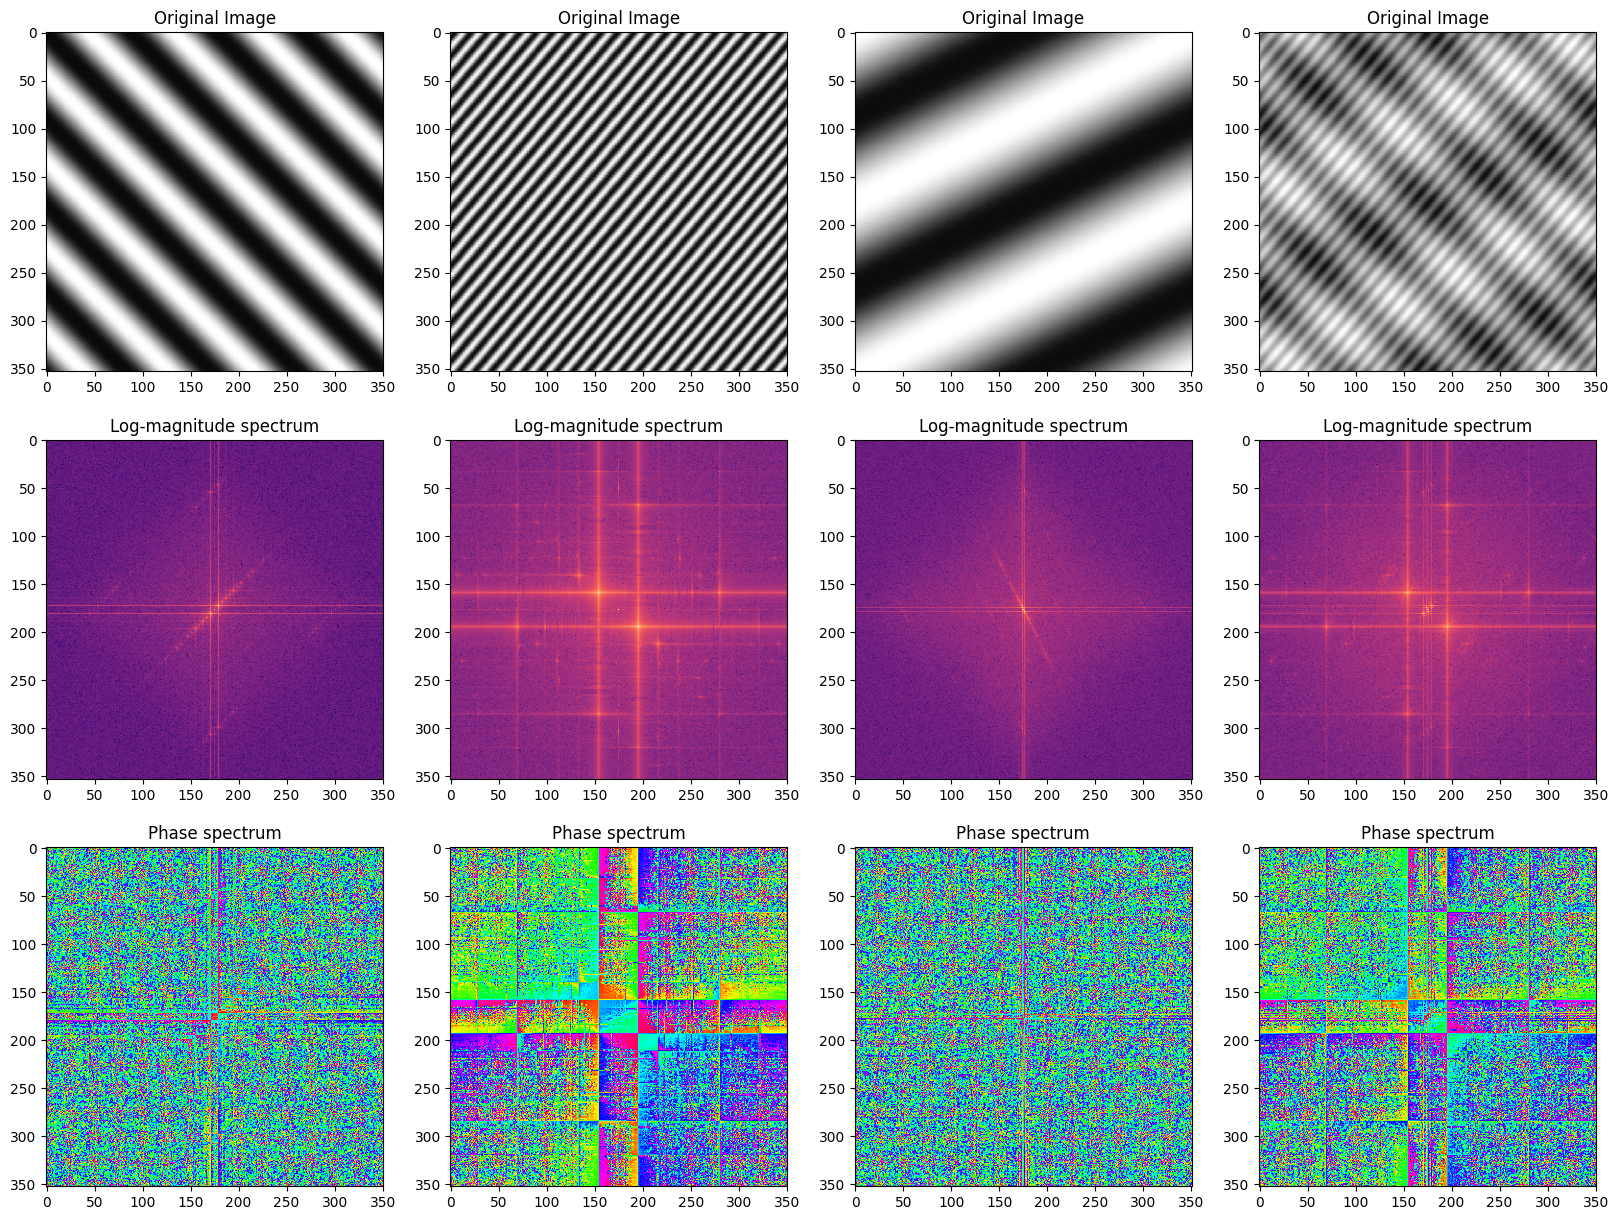

In [57]:
# 2D DFT
def read(filename):
    img = plt.imread(filename)
    if img.ndim == 2:
        return img
    if img.ndim == 3:
        return np.mean(img, axis=2)

img4 = read('grayscale4.png'); img5 = read('grayscale5.png')
img6 = read('grayscale6.png'); img7 = read('grayscale7.png')

def centeredFFT(img): # Returns DFT with centered coords
    return np.fft.fftshift(np.fft.fft2(img))

def mag(F): # Magnitude spectrum (log-scaled for visibility)
    return np.log10(np.abs(F))

def phs(F): # Phase spectrum
    return np.angle(F)

F4 = centeredFFT(img4); F5 = centeredFFT(img5) 
F6 = centeredFFT(img6); F7 = centeredFFT(img7) 

mag4 = mag(F4); mag5 = mag(F5); mag6 = mag(F6); mag7 = mag(F7) 
phs4 = phs(F4); phs5 = phs(F5); phs6 = phs(F6); phs7 = phs(F7)

# Show results
plt.figure(figsize=(20,15))

def pltImg(img):
    plt.imshow(img, cmap='gray', vmin=0, vmax=1); plt.title('Original Image')
def pltMag(img):
    plt.imshow(img, cmap='magma'); plt.title('Log-magnitude spectrum')
def pltPhs(img):
    plt.imshow(img, cmap='hsv', vmin=-np.pi, vmax=np.pi); plt.title('Phase spectrum')

plt.subplot(3,4,1); pltImg(img4)
plt.subplot(3,4,2); pltImg(img5)
plt.subplot(3,4,3); pltImg(img6)
plt.subplot(3,4,4); pltImg(img7)
plt.subplot(3,4,5); pltMag(mag4)
plt.subplot(3,4,6); pltMag(mag5)
plt.subplot(3,4,7); pltMag(mag6)
plt.subplot(3,4,8); pltMag(mag7)
plt.subplot(3,4,9); pltPhs(phs4)
plt.subplot(3,4,10); pltPhs(phs5)
plt.subplot(3,4,11); pltPhs(phs6)
plt.subplot(3,4,12); pltPhs(phs7)

plt.show()

C:\Users\WBS\AppData\Local\Temp\ipykernel_20028\2187269392.py:16: RuntimeWarning: divide by zero encountered in log10
  return np.log10(np.abs(F))


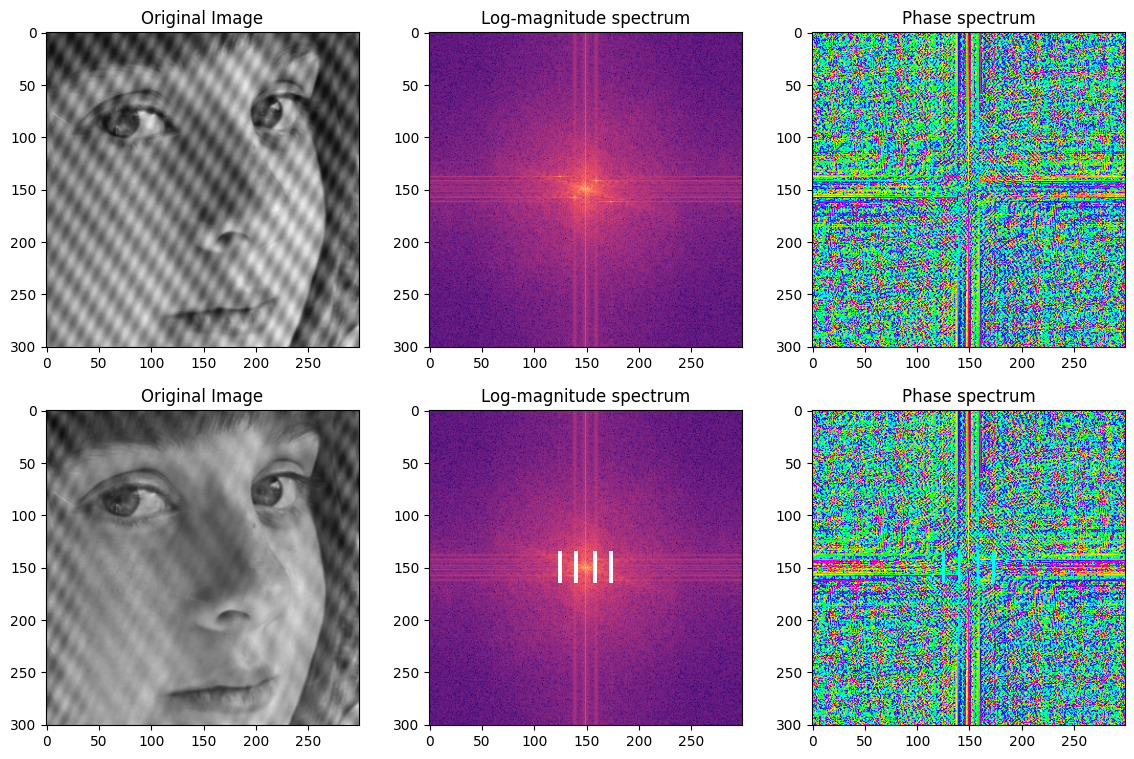

In [71]:
# Remove harmonic noise from an image
boy = read('noisyboy.png')
Fb = centeredFFT(boy); magb = mag(Fb); phsb = phs(Fb)

c = 149; freqs = [8,9,10, 23,24,25]
# Remove harmonic noise
Fc = Fb.copy()  # Will be filtered
for f in freqs:
    Fc[135:165,c+f] = 0
    Fc[135:165,c-f] = 0
magc = mag(Fc); phsc = phs(Fc)
coy = np.fft.ifft2(np.fft.ifftshift(Fc)).real

# Plot!
plt.figure(figsize=(14,9))
plt.subplot(2,3,1); pltImg(boy)
plt.subplot(2,3,2); pltMag(magb)
plt.subplot(2,3,3); pltPhs(phsb)

plt.subplot(2,3,4); pltImg(coy)
plt.subplot(2,3,5); pltMag(magc)
plt.subplot(2,3,6); pltPhs(phsc)

plt.show()